# The Perceptron

In [2]:
!pip install mxnet
import mxnet as mx
from mxnet import nd, autograd
import matplotlib.pyplot as plt
import numpy as np
mx.random.seed(1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 1.8 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


## A Separable Classification Problem

In [3]:
# generate fake (synthetic) data that is linearly separable with a margin epsilon given the data
def getfake(samples, dimensions, epsilon):
    wfake = nd.random_normal(shape=(dimensions))   # fake weight vector for separation
    bfake = nd.random_normal(shape=(1))            # fake bias
    wfake = wfake / nd.norm(wfake)                 # rescale to unit length

    # making some linearly separable data, simply by chosing the labels accordingly
    X = nd.zeros(shape=(samples, dimensions))
    Y = nd.zeros(shape=(samples))

    i = 0
    while (i < samples):
        tmp = nd.random_normal(shape=(1,dimensions))
        margin = nd.dot(tmp, wfake) + bfake
        if (nd.norm(tmp).asscalar() < 3) & (abs(margin.asscalar()) > epsilon):
            X[i,:] = tmp[0]
            Y[i] = 1 if margin.asscalar() > 0 else -1
            i += 1
    return X, Y

In [4]:
# plot the data with colors chosen according to the labels
def plotdata(X,Y):
    for (x,y) in zip(X,Y):
        if (y.asscalar() == 1):
            plt.scatter(x[0].asscalar(), x[1].asscalar(), color='r')
        else:
            plt.scatter(x[0].asscalar(), x[1].asscalar(), color='b')

# plot contour plots on a [-3,3] x [-3,3] grid 
def plotscore(w,d):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = nd.zeros(shape=(xgrid.size, ygrid.size, 2))
    zz[:,:,0] = nd.array(xx)
    zz[:,:,1] = nd.array(yy)
    vv = nd.dot(zz,w) + d
    CS = plt.contour(xgrid,ygrid,vv.asnumpy())
    plt.clabel(CS, inline=1, fontsize=10)

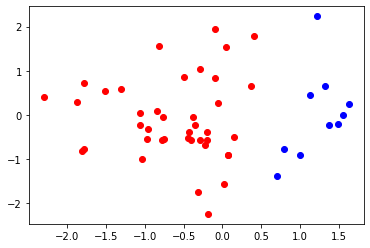

In [5]:
X, Y = getfake(50, 2, 0.3)
plotdata(X,Y)
plt.show()

## Perceptron Implementation

Encountered an error and updated parameters
data   [-0.3469252  -0.22134334], label 1.0
weight [-0.3469252  -0.22134334], bias  1.0


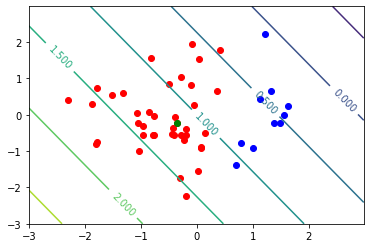

Encountered an error and updated parameters
data   [1.220331  2.2323563], label -1.0
weight [-1.5672562 -2.4536996], bias  0.0


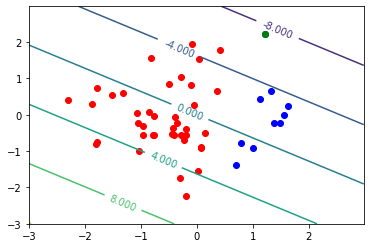

Encountered an error and updated parameters
data   [ 0.69854546 -1.3777038 ], label -1.0
weight [-2.2658017 -1.0759958], bias  -1.0


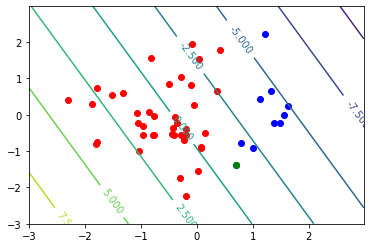

Encountered an error and updated parameters
data   [0.4113778 1.7742808], label 1.0
weight [-1.8544239  0.698285 ], bias  0.0


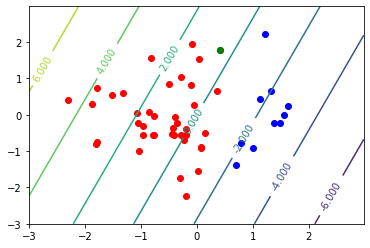

Encountered an error and updated parameters
data   [-0.22648837 -0.68788284], label 1.0
weight [-2.0809124   0.01040214], bias  1.0


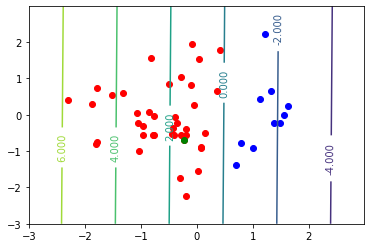

In [6]:
def perceptron(w,b,x,y):
    if (y * (nd.dot(w,x) + b)).asscalar() <= 0:
        w += y * x
        b += y
        return 1
    else:
        return 0

w = nd.zeros(shape=(2))
b = nd.zeros(shape=(1))
for (x,y) in zip(X,Y):
    res = perceptron(w,b,x,y)
    if (res == 1):
        print('Encountered an error and updated parameters')
        print('data   {}, label {}'.format(x.asnumpy(),y.asscalar()))
        print('weight {}, bias  {}'.format(w.asnumpy(),b.asscalar()))
        plotscore(w,b)
        plotdata(X,Y)
        plt.scatter(x[0].asscalar(), x[1].asscalar(), color='g')
        plt.show()

## Perceptron Convergence in Action

In [7]:
Eps = np.arange(0.025, 0.45, 0.025)
Err = np.zeros(shape=(Eps.size))

for j in range(10):
    for (i,epsilon) in enumerate(Eps):
        X, Y = getfake(1000, 2, epsilon)

        for (x,y) in zip(X,Y):
            Err[i] += perceptron(w,b,x,y)

Err = Err / 10.0            

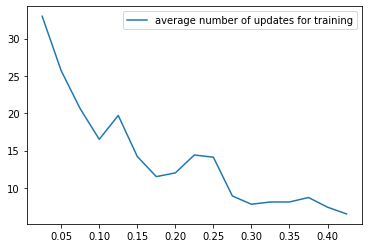

In [8]:
plt.plot(Eps, Err, label='average number of updates for training')
plt.legend()
plt.show()